# 1.3 Exercício Intermediário 1

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [38]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['class'] = iris.target

df = df.sample(frac=1)

for i in range(len(df)):
  if df.loc[i,'class'] == 2:
    df.loc[i,'class'] = -1
  elif df.loc[i,'class'] == 0:
    df.loc[i,'class'] = -1

n = len(df)
test_size = 0.3
X_train = df.iloc[:int(test_size*n),:-1].values
y_train = df.iloc[:int(test_size*n),-1].values

X_test = df.iloc[int(test_size*n):,:-1].values
y_test = df.iloc[int(test_size*n):,-1].values


In [18]:
def euclidean_distance(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must have the same dimension")
    return np.sqrt(sum((xi - yi) ** 2 for xi, yi in zip(x, y)))

def knn(X_train, y_train, X_test, k):

  y_pred = []
  Q = []
  for i in range(len(X_test)):
    distances = []
    for j in range(len(X_train)):
      distances.append((euclidean_distance(X_test[i], X_train[j]), y_train[j]))
    distances.sort()
    neighbors = distances[:k]
    labels = [neighbor[1] for neighbor in neighbors]
    Q1 = 0
    Q2 = 0

    for label in labels:
      if label == 1:
        Q1 += 1
      elif label == 2:
        Q2 += 1

    Q.append((Q1,Q2))

    y_pred.append(int(max(set(labels), key=labels.count)))
  # print(Q)
  return Q , y_pred

# Q,y_pred = knn(X_train, y_train, X_test, 25)

In [19]:
def get_labels(Q, y_pred):
    blues = []
    reds = []
    for q,pred in zip(Q,y_pred):

        if pred == 1:
            blues.append(q)
        else:
            reds.append(q)

    return blues,reds    

In [20]:
def plot_predictions(blues,reds):

    xb,yb = zip(*blues)
    xr,yr = zip(*reds)
    plt.figure(figsize=(8,8))
    plt.scatter(xb,yb, color = 'blue', marker='o')
    plt.scatter(xr,yr, color = 'red', marker='o')
    line = np.linspace(6, 18, 100)
    plt.plot(line, line, color="black", linestyle="-", label="y = x")
    plt.title("Previsões no plano Q1xQ2")
    plt.xlabel('Q2')
    plt.ylabel('Q1')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return None

In [21]:
def accuracy_percentage(y_pred, y_test):
    if len(y_pred) != len(y_test):
        raise ValueError("As listas devem ter o mesmo tamanho.")
    
    acertos = sum(yp == yt for yp, yt in zip(y_pred, y_test))
    total = len(y_test)
    return (acertos / total) * 100


Porcentagem de acertos para k = 1 :  94.28571428571428
Porcentagem de acertos para k = 2 :  91.42857142857143
Porcentagem de acertos para k = 3 :  95.23809523809523
Porcentagem de acertos para k = 4 :  94.28571428571428
Porcentagem de acertos para k = 5 :  95.23809523809523
Porcentagem de acertos para k = 6 :  93.33333333333333
Porcentagem de acertos para k = 7 :  94.28571428571428
Porcentagem de acertos para k = 8 :  93.33333333333333
Porcentagem de acertos para k = 9 :  94.28571428571428
Porcentagem de acertos para k = 10 :  92.38095238095238
Porcentagem de acertos para k = 11 :  95.23809523809523
Porcentagem de acertos para k = 12 :  91.42857142857143
Porcentagem de acertos para k = 13 :  91.42857142857143
Porcentagem de acertos para k = 14 :  89.52380952380953
Porcentagem de acertos para k = 15 :  88.57142857142857
Porcentagem de acertos para k = 16 :  89.52380952380953
Porcentagem de acertos para k = 17 :  87.61904761904762
Porcentagem de acertos para k = 18 :  87.61904761904762
P

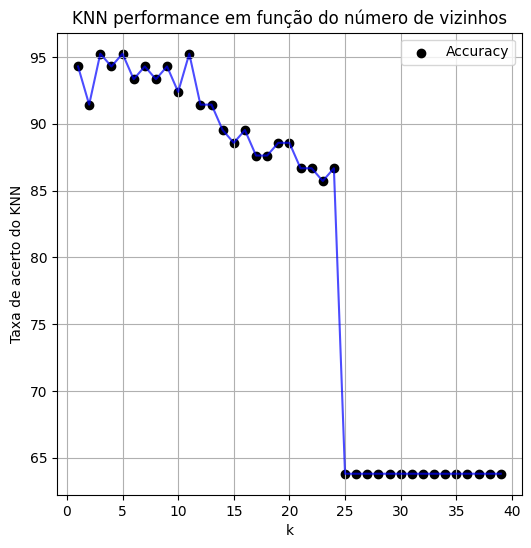

In [39]:
accuracy = []
ks =[]
for k in (range(1,40,1)):
    ks.append(k)
    Q,y_pred = knn(X_train,y_train, X_test, k)

    blues, reds = get_labels(Q, y_pred)

    acc = accuracy_percentage(y_pred, y_test)
    accuracy.append(acc)

    print(f'Porcentagem de acertos para k = {k} : ', acc)

plt.figure(figsize=(6,6))
plt.scatter(ks,accuracy,color = 'black', marker='o',label="Accuracy")
plt.plot(ks, accuracy, color="blue", linestyle="-", alpha=0.7)
plt.title('KNN performance em função do número de vizinhos')
plt.legend()
plt.xlabel('k')
plt.ylabel("Taxa de acerto do KNN")
plt.grid(True)
plt.show()
